In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import pearsonr

In [3]:
# Load the dataset
downsample_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final project/Model 2/downsample_df.csv')

Random forest

In [4]:
# Split the data into features (X) and targets (y)
X = downsample_data.drop(columns=['FSO_Att', 'RFL_Att'])
y_fso = downsample_data['FSO_Att']  # Target for the First model (FSO prediction)
y_rfl = downsample_data['RFL_Att']  # Target for the Second model (RFL prediction)


# Split the dataset into training and testing sets
X_train, X_test, y_fso_train, y_fso_test, y_rfl_train, y_rfl_test = train_test_split(
    X, y_fso, y_rfl, test_size=0.3, random_state=42
)


In [5]:
# Step 1: Train the first model to predict FSO_Att
fso_model = RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=True, oob_score=True)
fso_model.fit(X_train, y_fso_train)

# Predict FSO_Att on the test set
y_fso_pred = fso_model.predict(X_test)

# Step 2: Add predicted FSO_Att to the features for the second model
X_test['FSO_Att_pred'] = y_fso_pred
X_train['FSO_Att_pred'] = fso_model.predict(X_train)  # Include predictions on the training set as well

# Step 3: Train the second model to predict RFL_Att using the features + FSO_Att_pred
# Add `FSO_Att_pred` to the training features
rfl_model = RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=True, oob_score=True)
rfl_model.fit(X_train, y_rfl_train)

# Predict RFL_Att on the test set
y_rfl_pred = rfl_model.predict(X_test)

# Step 4: Evaluate the models
# Evaluate FSO Model
r2_fso = r2_score(y_fso_test, y_fso_pred)
rmse_fso = np.sqrt(mean_squared_error(y_fso_test, y_fso_pred))

# Evaluate RFL Model
r2_rfl = r2_score(y_rfl_test, y_rfl_pred)
rmse_rfl = np.sqrt(mean_squared_error(y_rfl_test, y_rfl_pred))

# Print results
print(f"FSO Model - R²: {r2_fso:.4f}, RMSE: {rmse_fso:.4f}")
print(f"RFL Model - R²: {r2_rfl:.4f}, RMSE: {rmse_rfl:.4f}")

# Evaluate (FSO, RFL) pair
# Combine predictions and true values
y_true_pair = np.vstack((y_fso_test, y_rfl_test)).T
y_pred_pair = np.vstack((y_fso_pred, y_rfl_pred)).T

# RMSE for the pair
rmse_pair = np.sqrt(mean_squared_error(y_true_pair, y_pred_pair))

# R² for the pair
ss_total = np.sum((y_true_pair - y_true_pair.mean(axis=0)) ** 2)
ss_residual = np.sum((y_true_pair - y_pred_pair) ** 2)
r2_pair = 1 - (ss_residual / ss_total)

print(f"(FSO, RFL) Pair - R²: {r2_pair:.4f}, RMSE: {rmse_pair:.4f}")


FSO Model - R²: 0.9302, RMSE: 1.1460
RFL Model - R²: 0.9495, RMSE: 0.8777
(FSO, RFL) Pair - R²: 0.9388, RMSE: 1.0207


Extra Tree Regressor

In [6]:
# Split the data into features (X) and targets (y)
X = downsample_data.drop(columns=['FSO_Att', 'RFL_Att'])
y_fso = downsample_data['FSO_Att']  # Target for the First model (FSO prediction)
y_rfl = downsample_data['RFL_Att']  # Target for the Second model (RFL prediction)


# Split the dataset into training and testing sets
X_train, X_test, y_fso_train, y_fso_test, y_rfl_train, y_rfl_test = train_test_split(
    X, y_fso, y_rfl, test_size=0.3, random_state=42
)


In [7]:
# Step 1: Train the first model to predict FSO_Att
fso_model = ExtraTreesRegressor(n_estimators=100, random_state=42, bootstrap=True, oob_score=True)
fso_model.fit(X_train, y_fso_train)

# Predict FSO_Att on the test set
y_fso_pred = fso_model.predict(X_test)

# Step 2: Add predicted FSO_Att to the features for the second model
X_test['FSO_Att_pred'] = y_fso_pred
X_train['FSO_Att_pred'] = fso_model.predict(X_train)  # Include predictions on the training set as well

# Step 3: Train the second model to predict RFL_Att using the features + FSO_Att_pred
# Add `FSO_Att_pred` to the training features
rfl_model = ExtraTreesRegressor(n_estimators=100, random_state=42, bootstrap=True, oob_score=True)
rfl_model.fit(X_train, y_rfl_train)

# Predict RFL_Att on the test set
y_rfl_pred = rfl_model.predict(X_test)

# Step 4: Evaluate the models
# Evaluate FSO Model
r2_fso = r2_score(y_fso_test, y_fso_pred)
rmse_fso = np.sqrt(mean_squared_error(y_fso_test, y_fso_pred))

# Evaluate RFL Model
r2_rfl = r2_score(y_rfl_test, y_rfl_pred)
rmse_rfl = np.sqrt(mean_squared_error(y_rfl_test, y_rfl_pred))

# Print results
print(f"FSO Model - R²: {r2_fso:.4f}, RMSE: {rmse_fso:.4f}")
print(f"RFL Model - R²: {r2_rfl:.4f}, RMSE: {rmse_rfl:.4f}")

# Evaluate (FSO, RFL) pair
# Combine predictions and true values
y_true_pair = np.vstack((y_fso_test, y_rfl_test)).T
y_pred_pair = np.vstack((y_fso_pred, y_rfl_pred)).T

# RMSE for the pair
rmse_pair = np.sqrt(mean_squared_error(y_true_pair, y_pred_pair))

# R² for the pair
ss_total = np.sum((y_true_pair - y_true_pair.mean(axis=0)) ** 2)
ss_residual = np.sum((y_true_pair - y_pred_pair) ** 2)
r2_pair = 1 - (ss_residual / ss_total)

print(f"(FSO, RFL) Pair - R²: {r2_pair:.4f}, RMSE: {rmse_pair:.4f}")

FSO Model - R²: 0.9284, RMSE: 1.1606
RFL Model - R²: 0.9585, RMSE: 0.7959
(FSO, RFL) Pair - R²: 0.9419, RMSE: 0.9951


OPTIMAL FEATURE SELECTION - EXTRA TREE REGRESSOR

In [8]:
# Split the data into features (X) and targets (y)
X = downsample_data.drop(columns=['FSO_Att', 'RFL_Att'])
y_rfl = downsample_data['RFL_Att']
y_fso = downsample_data['FSO_Att']

# Combine RFL and FSO into a single target array (RFL first, FSO second)
y_pair = np.vstack((y_rfl, y_fso)).T

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_pair, test_size=0.3, random_state=42)

# Initialize storage for results
results_pair = []

# Initialize the Extra Trees Regressor model
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42, bootstrap=True, oob_score=True)

# Feature selection loop
for num_features in range(X_train.shape[1], 0, -1):
    # Train the model
    et_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = et_model.predict(X_test)

    # Calculate RMSE
    rmse_pair = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calculate R² (coefficient of determination)
    ss_total = np.sum((y_test - y_test.mean(axis=0)) ** 2)
    ss_residual = np.sum((y_test - y_pred) ** 2)
    r2_pair = 1 - (ss_residual / ss_total)

    # Store results
    results_pair.append((num_features, rmse_pair, r2_pair, et_model.oob_score_))

    # Feature importance and least important feature removal
    importances = et_model.feature_importances_
    least_important = X_train.columns[np.argmin(importances)]
    print(f"Removing least important feature: {least_important}")

    # Drop the least important feature from training and testing sets
    X_train = X_train.drop(columns=[least_important])
    X_test = X_test.drop(columns=[least_important])

# Convert results to a DataFrame for visualization
results_pair_df = pd.DataFrame(results_pair, columns=['Num_Features', 'RMSE', 'R2', 'OOB_Score'])

# Display the results
results_pair_df

Removing least important feature: WindDirection
Removing least important feature: WindSpeedMin
Removing least important feature: WindSpeed
Removing least important feature: WindSpeedMax
Removing least important feature: Frequency
Removing least important feature: TemperatureDifference
Removing least important feature: RelativeHumidity
Removing least important feature: SYNOPCode
Removing least important feature: Time
Removing least important feature: RainIntensityMin
Removing least important feature: Particulate
Removing least important feature: AbsoluteHumidityMin
Removing least important feature: RainIntensityMax
Removing least important feature: TemperatureMin
Removing least important feature: ParticulateMax
Removing least important feature: TemperatureMax
Removing least important feature: VisibilityMin
Removing least important feature: AbsoluteHumidityMax
Removing least important feature: RainIntensity
Removing least important feature: Visibility
Removing least important feature: Te

,Num_Features,RMSE,R2,OOB_Score
0,25,1.039494,0.936578,0.937635
1,24,1.043624,0.936073,0.937571
2,23,1.033152,0.937349,0.938342
3,22,1.029767,0.937759,0.938673
4,21,1.060648,0.933970,0.936820
5,20,1.104052,0.928455,0.926585
6,19,1.139186,0.923829,0.923243
7,18,1.157877,0.921309,0.919680
8,17,1.160746,0.920919,0.918674
9,16,1.245195,0.908993,0.906426


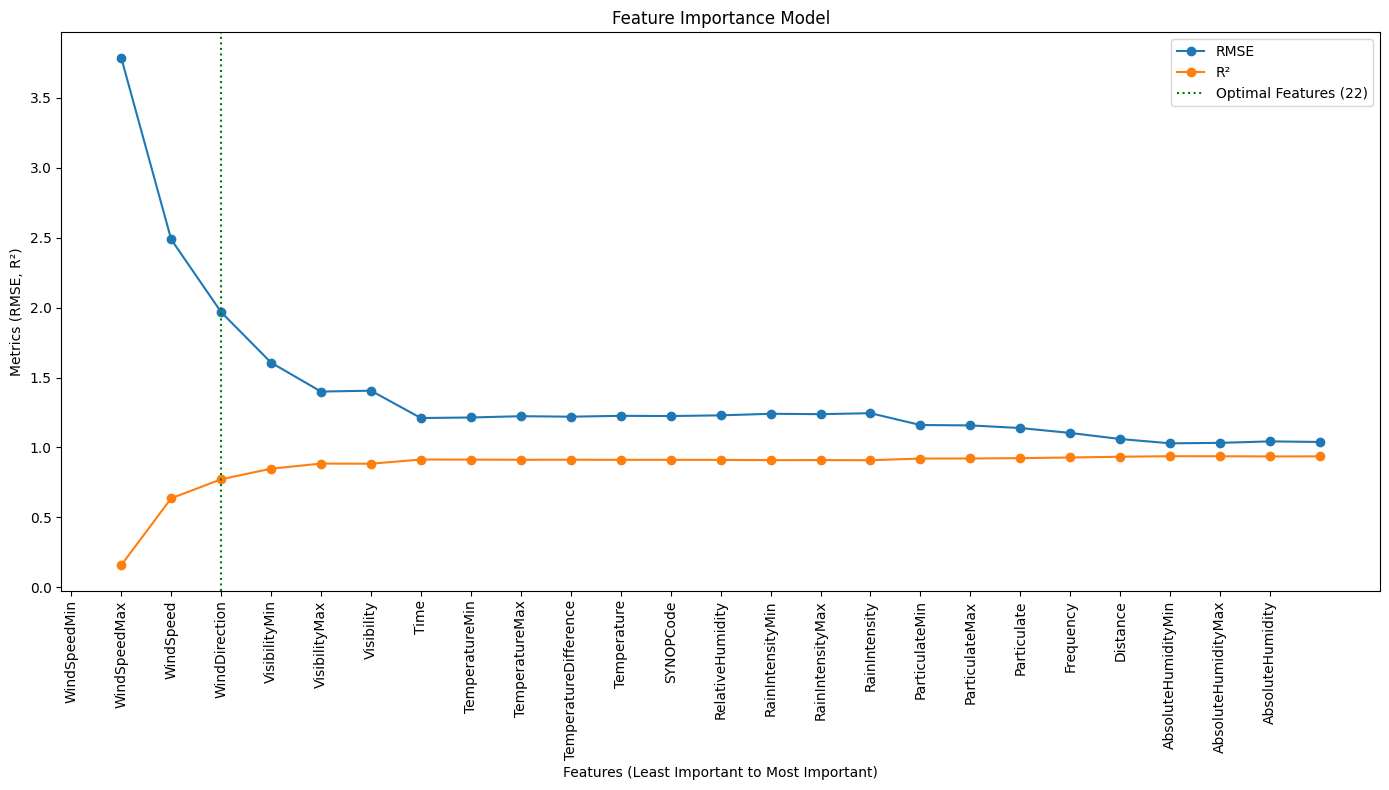

In [9]:
# Create a list of features in the correct order (most important to least important)
# Remaining features + removed features (in reverse removal order)
features_removed = [f for f in X.columns if f not in X_train.columns]
features_ordered = list(X_train.columns) + features_removed[::-1]

# Plot the results with feature names on the x-axis
plt.figure(figsize=(14, 8))
plt.plot(results_pair_df['Num_Features'], results_pair_df['RMSE'], label='RMSE', marker='o')
plt.plot(results_pair_df['Num_Features'], results_pair_df['R2'], label='R²', marker='o')

# Use feature names as x-ticks (ordered)
plt.xticks(
    ticks=range(len(features_ordered)),  # Total number of features (ordered)
    labels=features_ordered,            # Feature names in the correct order
    rotation=90                         # Rotate x-axis labels for better readability
)

# Highlight optimal number of features using RMSE minimum
optimal_features_index = results_pair_df['RMSE'].idxmin()  # Index of the minimum RMSE
optimal_num_features = results_pair_df.loc[optimal_features_index, 'Num_Features']  # Number of features at minimum RMSE
plt.axvline(x=optimal_features_index, color='green', linestyle='dotted', label=f'Optimal Features ({optimal_num_features})')

# Add titles and labels
plt.title('Feature Importance Model')
plt.xlabel('Features (Least Important to Most Important)')
plt.ylabel('Metrics (RMSE, R²)')
plt.legend()
plt.tight_layout()  # Ensure the layout fits within the figure bounds
plt.show()



HYPER PARAMETER TUNNING

In [11]:
# Split the data into features (X) and targets (y)
X = downsample_data.drop(columns=['FSO_Att', 'RFL_Att'])
y_fso = downsample_data['FSO_Att']  # Target for the First model (FSO prediction)
y_rfl = downsample_data['RFL_Att']  # Target for the Second model (RFL prediction)


# Split the dataset into training and testing sets
X_train, X_test, y_fso_train, y_fso_test, y_rfl_train, y_rfl_test = train_test_split(
    X, y_fso, y_rfl, test_size=0.3, random_state=42
)

In [12]:

# Hyperparameter tuning grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Step 1: Hyperparameter tuning for the FSO_Att model
fso_model = ExtraTreesRegressor(random_state=42, bootstrap=True, oob_score=True)
grid_search_fso = GridSearchCV(estimator=fso_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_fso.fit(X_train, y_fso_train)
best_fso_model = grid_search_fso.best_estimator_

# Predict FSO_Att
y_fso_pred = best_fso_model.predict(X_test)

# Add predicted FSO_Att to the features for the second model
X_train['FSO_Att_pred'] = best_fso_model.predict(X_train)
X_test['FSO_Att_pred'] = y_fso_pred

# Step 2: Hyperparameter tuning for the RFL_Att model
rfl_model = ExtraTreesRegressor(random_state=42, bootstrap=True, oob_score=True)
grid_search_rfl = GridSearchCV(estimator=rfl_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rfl.fit(X_train, y_rfl_train)
best_rfl_model = grid_search_rfl.best_estimator_

# Predict RFL_Att
y_rfl_pred = best_rfl_model.predict(X_test)

# Step 3: Evaluate the models
# Combine predictions and true values for pair evaluation
y_true_pair = np.vstack((y_fso_test, y_rfl_test)).T
y_pred_pair = np.vstack((y_fso_pred, y_rfl_pred)).T

# RMSE for the pair
rmse_pair = np.sqrt(mean_squared_error(y_true_pair, y_pred_pair))

# R² for the pair
ss_total = np.sum((y_true_pair - y_true_pair.mean(axis=0)) ** 2)
ss_residual = np.sum((y_true_pair - y_pred_pair) ** 2)
r2_pair = 1 - (ss_residual / ss_total)

# Output results
print("Hyperparameters for FSO_Att model:", grid_search_fso.best_params_)
print("Hyperparameters for RFL_Att model:", grid_search_rfl.best_params_)
print(f"(FSO, RFL) Pair - R²: {r2_pair:.4f}, RMSE: {rmse_pair:.4f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Hyperparameters for FSO_Att model: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Hyperparameters for RFL_Att model: {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
(FSO, RFL) Pair - R²: 0.9424, RMSE: 0.9907


In [13]:
X_test

,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,RainIntensityMax,...,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,FSO_Att_pred
5394,17.073652,17.753948,15.924988,3963.914558,73500000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,30.404403,17,27763.794340,29743.791416,25884.058776,27.677522,0.112776,0.447486,0.101871,8.285621
6390,4.485939,4.631193,4.197364,4818.001528,73500000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.726426,0,75003.196800,75154.751730,67520.510019,84.801676,0.216719,1.183985,0.201463,9.206996
10376,17.665329,19.100393,16.286449,2959.728315,83500000000,46.427073,50.454333,44.154906,0.000000,0.000000,...,20.998979,10,22305.146570,23294.355462,20617.500596,31.681345,0.544609,2.666427,0.519063,8.329123
5721,17.880449,18.575452,17.697096,3966.927330,83500000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,32.137844,10,18007.695920,18555.756384,17768.854053,99.738470,1.610302,2.905632,1.574674,9.537379
18087,20.008755,21.986195,19.940114,2117.892810,83500000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,24.490645,8,5489.109666,5533.558638,5044.246471,98.024478,1.171343,2.345289,1.113760,15.005593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,7.391389,7.536616,6.899243,2962.265818,83500000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.880664,0,74997.595370,79607.515130,72707.101140,86.158752,0.244394,1.470040,0.229276,6.339378
15879,17.093628,17.771574,15.620319,2964.727770,83500000000,418.002784,431.445646,383.925185,0.000000,0.000000,...,21.835313,21,4106.190517,4483.637637,4099.098638,84.732218,0.802872,1.755586,0.776952,12.047200
1922,20.237237,21.474640,19.916753,2117.327898,83500000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,24.181661,3,10537.879340,11001.041734,9663.261332,121.217797,0.414986,1.452484,0.384284,9.845618
19021,5.287052,5.451833,4.997716,4826.246047,83500000000,13.793589,14.963780,12.630575,0.000000,0.000000,...,5.545952,5,45530.109430,47809.861016,41845.916306,96.243352,0.000000,2.471083,0.000000,5.245973


In [14]:
X_test['RFL_Att_pred'] = y_rfl_pred

In [15]:
X_test['RFL_Att'] = y_rfl_test
X_test['FSO_Att'] = y_fso_test

In [16]:
X_test

,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,RainIntensityMax,...,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,FSO_Att_pred,RFL_Att_pred,RFL_Att,FSO_Att
5394,17.073652,17.753948,15.924988,3963.914558,73500000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,29743.791416,25884.058776,27.677522,0.112776,0.447486,0.101871,8.285621,10.724436,10.260835,7.378968
6390,4.485939,4.631193,4.197364,4818.001528,73500000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,75154.751730,67520.510019,84.801676,0.216719,1.183985,0.201463,9.206996,11.951162,17.860209,17.468415
10376,17.665329,19.100393,16.286449,2959.728315,83500000000,46.427073,50.454333,44.154906,0.000000,0.000000,...,23294.355462,20617.500596,31.681345,0.544609,2.666427,0.519063,8.329123,7.481567,7.669362,7.651125
5721,17.880449,18.575452,17.697096,3966.927330,83500000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18555.756384,17768.854053,99.738470,1.610302,2.905632,1.574674,9.537379,11.347637,11.250594,7.482632
18087,20.008755,21.986195,19.940114,2117.892810,83500000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5533.558638,5044.246471,98.024478,1.171343,2.345289,1.113760,15.005593,10.887781,11.864859,13.526314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,7.391389,7.536616,6.899243,2962.265818,83500000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,79607.515130,72707.101140,86.158752,0.244394,1.470040,0.229276,6.339378,4.290303,4.415692,6.169148
15879,17.093628,17.771574,15.620319,2964.727770,83500000000,418.002784,431.445646,383.925185,0.000000,0.000000,...,4483.637637,4099.098638,84.732218,0.802872,1.755586,0.776952,12.047200,8.619956,7.994477,11.359701
1922,20.237237,21.474640,19.916753,2117.327898,83500000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11001.041734,9663.261332,121.217797,0.414986,1.452484,0.384284,9.845618,7.566404,7.867364,9.174562
19021,5.287052,5.451833,4.997716,4826.246047,83500000000,13.793589,14.963780,12.630575,0.000000,0.000000,...,47809.861016,41845.916306,96.243352,0.000000,2.471083,0.000000,5.245973,12.005379,11.909054,4.772181


PEARSON CORELATION

In [17]:
# Pearson correlation between actual RFL and FSO
actual_rfl_fso_corr, _ = pearsonr(y_rfl_test, y_fso_test)
print(f"Pearson correlation between actual RFL_Att and FSO_Att: {actual_rfl_fso_corr:.4f}")

# Pearson correlation between predicted RFL and FSO
predicted_rfl_fso_corr, _ = pearsonr(y_rfl_pred, y_fso_pred)
print(f"Pearson correlation between predicted RFL_Att and FSO_Att: {predicted_rfl_fso_corr:.4f}")


Pearson correlation between actual RFL_Att and FSO_Att: 0.0956
Pearson correlation between predicted RFL_Att and FSO_Att: 0.0742


Pearson Correlation between Actual RFL_Att and FSO_Att (0.0956).  This indicates a very weak positive linear correlation between the actual RFL_Att and FSO_Att values. The value is close to 0, suggesting that there is almost no linear relationship between these two variables in the actual data. Similarly, the Pearson correlation for the predicted values is also very weak and positive, but even lower than the actual values.


In [18]:
# Create a function to compute Pearson correlation for each SYNOPCode group
def compute_correlation(group):
    # Calculate Pearson correlation between actual RFL and FSO for the current SYNOPCode group
    actual_corr, _ = pearsonr(group['RFL_Att'], group['FSO_Att'])

    # Calculate Pearson correlation between predicted RFL and FSO for the current SYNOPCode group
    predicted_corr, _ = pearsonr(group['RFL_Att_pred'], group['FSO_Att_pred'])

    # Calculate the difference between predicted and measured correlations
    correlation_diff = abs(predicted_corr - actual_corr)

    return pd.Series({
        'measured_rfl_fso_corr': round(actual_corr, 3),
        'predicted_rfl_fso_corr': round(predicted_corr, 3),
        'correlation_diff': round(correlation_diff, 3)
    })

# Group by SYNOPCode and apply the correlation function
correlation_results = X_test.groupby('SYNOPCode').apply(compute_correlation).reset_index()

# Display the results
print(correlation_results)



   SYNOPCode  measured_rfl_fso_corr  predicted_rfl_fso_corr  correlation_diff
0          0                 -0.046                  -0.052             0.007
1          3                 -0.341                  -0.377             0.036
2          4                  0.541                   0.522             0.019
3          5                 -0.228                  -0.243             0.016
4          6                  0.304                   0.271             0.033
5          7                  0.808                   0.821             0.013
6          8                 -0.158                  -0.198             0.040


<ipython-input-18-c2602e38a9a2>:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_results = X_test.groupby('SYNOPCode').apply(compute_correlation).reset_index()


MUTUAL INFORMATION

In [19]:

# Convert Series to numpy arrays and reshape them
y_rfl_test_array = y_rfl_test.values.reshape(-1, 1)
y_fso_test_array = y_fso_test.values.reshape(-1, 1)

# Calculate mutual information between actual RFL_Att and FSO_Att
mi_actual = mutual_info_regression(y_rfl_test_array, y_fso_test_array)
print(f"Mutual Information between actual RFL_Att and FSO_Att: {mi_actual[0]:.4f}")

# For the predicted values
y_rfl_pred_array = y_rfl_pred.reshape(-1, 1)
y_fso_pred_array = y_fso_pred.reshape(-1, 1)

# Calculate mutual information between predicted RFL_Att and FSO_Att
mi_predicted = mutual_info_regression(y_rfl_pred_array, y_fso_pred_array)
print(f"Mutual Information between predicted RFL_Att and FSO_Att: {mi_predicted[0]:.4f}")


Mutual Information between actual RFL_Att and FSO_Att: 0.2814
Mutual Information between predicted RFL_Att and FSO_Att: 0.3945


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mutual Information between actual RFL_Att and FSO_Att: 0.2814. This value indicates that there is a moderate amount of shared information between the actual values of RFL_Att and FSO_Att.A value of 0.2814 suggests that there is a meaningful, though not extremely strong, relationship between the actual values of these two variables. Mutual Information between predicted RFL_Att and FSO_Att: 0.3945. imply that the model's predictions are capturing a stronger association between these two variables than the raw data itself.

In [20]:
# Create a function to compute Mutual Information for each SYNOPCode group
def compute_mutual_info(group):
    # Separate the features (RFL_Att and FSO_Att) and target (RFL_Att_pred and FSO_Att_pred)
    actual_rfl = group['RFL_Att']
    actual_fso = group['FSO_Att']
    predicted_rfl = group['RFL_Att_pred']
    predicted_fso = group['FSO_Att_pred']

    # Compute Mutual Information for measured (actual) RFL
    mi_actual_rfl = mutual_info_regression(actual_rfl.values.reshape(-1, 1), actual_rfl)

    # Compute Mutual Information for measured (actual) FSO
    mi_actual_fso = mutual_info_regression(actual_fso.values.reshape(-1, 1), actual_fso)

    # Compute Mutual Information for predicted RFL
    mi_predicted_rfl = mutual_info_regression(predicted_rfl.values.reshape(-1, 1), predicted_rfl)

    # Compute Mutual Information for predicted FSO
    mi_predicted_fso = mutual_info_regression(predicted_fso.values.reshape(-1, 1), predicted_fso)

    # Sum the Mutual Information values for RFL and FSO
    mi_actual_rfl_fso = mi_actual_rfl[0] + mi_actual_fso[0]
    mi_pred_rfl_fso = mi_predicted_rfl[0] + mi_predicted_fso[0]

    # Calculate the difference between predicted and measured MI
    mi_diff = abs(mi_pred_rfl_fso - mi_actual_rfl_fso)

    return pd.Series({
        'measured_rfl_fso_mi': round(mi_actual_rfl_fso, 3),
        'predicted_rfl_fso_mi': round(mi_pred_rfl_fso, 3),
        'mi_diff': round(mi_diff, 3)
    })

# Group by SYNOPCode and apply the MI function
mi_results = X_test.groupby('SYNOPCode').apply(compute_mutual_info).reset_index()

# Display the results
print(mi_results)

   SYNOPCode  measured_rfl_fso_mi  predicted_rfl_fso_mi  mi_diff
0          0               12.946                12.946    0.000
1          3                5.693                 5.693    0.000
2          4                7.542                 7.542    0.000
3          5               11.578                11.578    0.001
4          6               12.154                12.154    0.000
5          7                6.969                 6.969    0.000
6          8                9.748                 9.748    0.000


<ipython-input-20-807086749647>:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mi_results = X_test.groupby('SYNOPCode').apply(compute_mutual_info).reset_index()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Prepare a DataFrame to store entropy and mutual information results
results = []

# Collect unique SYNOPCodes (assuming SYNOPCode is a column in the best_predictions DataFrame)
unique_synop_codes = X_test['SYNOPCode'].unique()

# Create a figure for all heatmaps
num_synop_codes = len(unique_synop_codes)
fig, axes = plt.subplots(num_synop_codes, 2, figsize=(12, 6 * num_synop_codes))

for i, synop_code in enumerate(unique_synop_codes):
    # Filter the data for the current SYNOPCode
    df_filtered_y1 = best_predictions_y1[best_predictions_y1['SYNOPCode'] == synop_code]
    df_filtered_y2 = best_predictions_y2[best_predictions_y2['SYNOPCode'] == synop_code]

    # --- Analysis for y1 ---
    y1_actual = df_filtered_y1['Actual_y1']
    y1_predicted = df_filtered_y1['Predicted_y1']

    # Create a 2D histogram for y1
    heatmap_data_y1, xedges_y1, yedges_y1 = np.histogram2d(y1_actual, y1_predicted, bins=50, range=[[0, 50], [0, 50]])
    joint_prob_y1 = heatmap_data_y1 / heatmap_data_y1.sum()

    # Plot the heatmap for y1
    sns.heatmap(joint_prob_y1.T, cmap='viridis', ax=axes[i, 0], cbar=True, xticklabels=5, yticklabels=5)
    axes[i, 0].invert_yaxis()
    axes[i, 0].set_title(f'Heatmap (y1) for SYNOPCode {synop_code}')
    axes[i, 0].set_xlabel('Actual y1 Values')
    axes[i, 0].set_ylabel('Predicted y1 Values')

    # Calculate entropies and mutual information for y1
    marginal_x_y1 = joint_prob_y1.sum(axis=1)
    marginal_y_y1 = joint_prob_y1.sum(axis=0)
    H_X_y1 = entropy(marginal_x_y1, base=2)
    H_Y_y1 = entropy(marginal_y_y1, base=2)
    H_XY_y1 = entropy(joint_prob_y1.ravel(), base=2)
    mutual_information_y1 = H_X_y1 + H_Y_y1 - H_XY_y1

    # --- Analysis for y2 ---
    y2_actual = df_filtered_y2['Actual_y2']
    y2_predicted = df_filtered_y2['Predicted_y2']

    # Create a 2D histogram for y2
    heatmap_data_y2, xedges_y2, yedges_y2 = np.histogram2d(y2_actual, y2_predicted, bins=50, range=[[0, 50], [0, 50]])
    joint_prob_y2 = heatmap_data_y2 / heatmap_data_y2.sum()

    # Plot the heatmap for y2
    sns.heatmap(joint_prob_y2.T, cmap='viridis', ax=axes[i, 1], cbar=True, xticklabels=5, yticklabels=5)
    axes[i, 1].invert_yaxis()
    axes[i, 1].set_title(f'Heatmap (y2) for SYNOPCode {synop_code}')
    axes[i, 1].set_xlabel('Actual y2 Values')
    axes[i, 1].set_ylabel('Predicted y2 Values')

    # Calculate entropies and mutual information for y2
    marginal_x_y2 = joint_prob_y2.sum(axis=1)
    marginal_y_y2 = joint_prob_y2.sum(axis=0)
    H_X_y2 = entropy(marginal_x_y2, base=2)
    H_Y_y2 = entropy(marginal_y_y2, base=2)
    H_XY_y2 = entropy(joint_prob_y2.ravel(), base=2)
    mutual_information_y2 = H_X_y2 + H_Y_y2 - H_XY_y2

    # Store results in a dictionary
    results.append({
        'SYNOPCode': synop_code,
        'H_X_y1': H_X_y1,
        'H_Y_y1': H_Y_y1,
        'H_XY_y1': H_XY_y1,
        'Mutual_Info_y1': mutual_information_y1,
        'Normalized_MI_y1': mutual_information_y1 / H_XY_y1,
        'H_X_y2': H_X_y2,
        'H_Y_y2': H_Y_y2,
        'H_XY_y2': H_XY_y2,
        'Mutual_Info_y2': mutual_information_y2,
        'Normalized_MI_y2': mutual_information_y2 / H_XY_y2
    })

# Finalize the heatmap figure
plt.tight_layout()
plt.show()

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('entropy_mutual_information_results.csv', index=False)

# Display the results as a table
print("\nEntropy and Mutual Information Results:")
print(results_df)

Heat Map

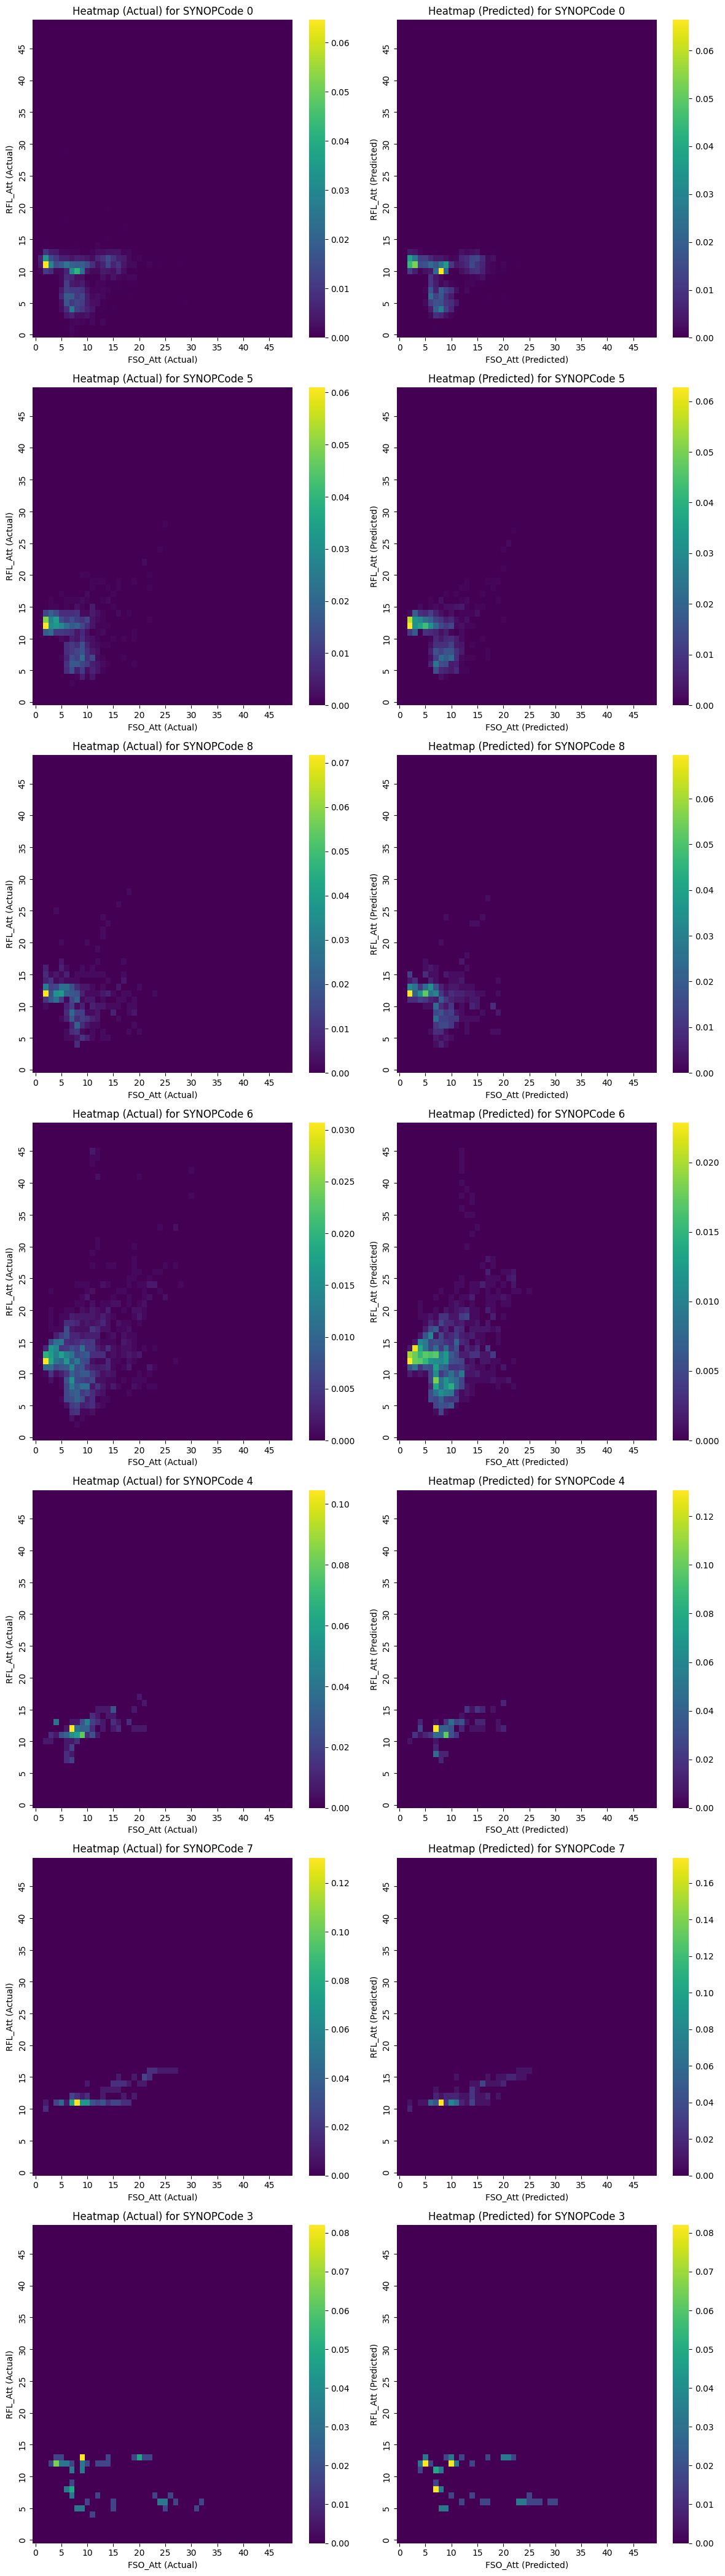


Entropy and Mutual Information Results:
   SYNOPCode  H_X_actual  H_Y_actual  H_XY_actual  Mutual_Info_actual  \
0          0    3.801502    3.124863     6.447439            0.478925   
1          5    3.549419    3.332681     6.280841            0.601260   
2          8    3.750549    3.415520     6.376686            0.789383   
3          6    4.010237    4.088541     7.459045            0.639734   
4          4    3.625595    2.569504     5.209587            0.985512   
5          7    4.195453    1.829997     4.973563            1.051887   
6          3    4.087174    2.780348     5.092714            1.774808   

   Normalized_MI_actual  H_X_predicted  H_Y_predicted  H_XY_predicted  \
0              0.074281       3.614058       2.951581        6.001060   
1              0.095729       3.553442       3.218362        6.057330   
2              0.123792       3.690585       3.249992        6.183461   
3              0.085766       3.938262       4.027580        7.305659   
4        

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Prepare a DataFrame to store entropy and mutual information results
results = []

# Collect unique SYNOPCodes (assuming SYNOPCode is a column in the X_test DataFrame)
unique_synop_codes = X_test['SYNOPCode'].unique()

# Create a figure for all heatmaps
num_synop_codes = len(unique_synop_codes)
fig, axes = plt.subplots(num_synop_codes, 2, figsize=(12, 6 * num_synop_codes))

for i, synop_code in enumerate(unique_synop_codes):
    # Filter the data for the current SYNOPCode
    df_filtered = X_test[X_test['SYNOPCode'] == synop_code]

    # --- Analysis for FSO_Att and RFL_Att ---
    fso_actual = df_filtered['FSO_Att']
    rfl_actual = df_filtered['RFL_Att']
    fso_predicted = df_filtered['FSO_Att_pred']
    rfl_predicted = df_filtered['RFL_Att_pred']

    # Create a 2D histogram for actual FSO and RFL (comparison of actuals)
    heatmap_data_actual, xedges_actual, yedges_actual = np.histogram2d(fso_actual, rfl_actual, bins=50, range=[[0, 50], [0, 50]])
    joint_prob_actual = heatmap_data_actual / heatmap_data_actual.sum()

    # Plot the heatmap for actual FSO and RFL
    sns.heatmap(joint_prob_actual.T, cmap='viridis', ax=axes[i, 0], cbar=True, xticklabels=5, yticklabels=5)
    axes[i, 0].invert_yaxis()
    axes[i, 0].set_title(f'Heatmap (Actual) for SYNOPCode {synop_code}')
    axes[i, 0].set_xlabel('FSO_Att (Actual)')
    axes[i, 0].set_ylabel('RFL_Att (Actual)')

    # Calculate entropies and mutual information for actual FSO and RFL
    marginal_x_actual = joint_prob_actual.sum(axis=1)
    marginal_y_actual = joint_prob_actual.sum(axis=0)
    H_X_actual = entropy(marginal_x_actual, base=2)
    H_Y_actual = entropy(marginal_y_actual, base=2)
    H_XY_actual = entropy(joint_prob_actual.ravel(), base=2)
    mutual_information_actual = H_X_actual + H_Y_actual - H_XY_actual

    # Create a 2D histogram for predicted FSO and RFL (comparison of predictions)
    heatmap_data_predicted, xedges_predicted, yedges_predicted = np.histogram2d(fso_predicted, rfl_predicted, bins=50, range=[[0, 50], [0, 50]])
    joint_prob_predicted = heatmap_data_predicted / heatmap_data_predicted.sum()

    # Plot the heatmap for predicted FSO and RFL
    sns.heatmap(joint_prob_predicted.T, cmap='viridis', ax=axes[i, 1], cbar=True, xticklabels=5, yticklabels=5)
    axes[i, 1].invert_yaxis()
    axes[i, 1].set_title(f'Heatmap (Predicted) for SYNOPCode {synop_code}')
    axes[i, 1].set_xlabel('FSO_Att (Predicted)')
    axes[i, 1].set_ylabel('RFL_Att (Predicted)')

    # Calculate entropies and mutual information for predicted FSO and RFL
    marginal_x_predicted = joint_prob_predicted.sum(axis=1)
    marginal_y_predicted = joint_prob_predicted.sum(axis=0)
    H_X_predicted = entropy(marginal_x_predicted, base=2)
    H_Y_predicted = entropy(marginal_y_predicted, base=2)
    H_XY_predicted = entropy(joint_prob_predicted.ravel(), base=2)
    mutual_information_predicted = H_X_predicted + H_Y_predicted - H_XY_predicted

    # Store results in a dictionary
    results.append({
        'SYNOPCode': synop_code,
        'H_X_actual': H_X_actual,
        'H_Y_actual': H_Y_actual,
        'H_XY_actual': H_XY_actual,
        'Mutual_Info_actual': mutual_information_actual,
        'Normalized_MI_actual': mutual_information_actual / H_XY_actual,
        'H_X_predicted': H_X_predicted,
        'H_Y_predicted': H_Y_predicted,
        'H_XY_predicted': H_XY_predicted,
        'Mutual_Info_predicted': mutual_information_predicted,
        'Normalized_MI_predicted': mutual_information_predicted / H_XY_predicted
    })

# Finalize the heatmap figure
plt.tight_layout()
plt.show()

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('entropy_mutual_information_results_synopcode.csv', index=False)

# Display the results as a table
print("\nEntropy and Mutual Information Results:")
print(results_df)
